In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as mt

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
from sklearn.mixture import GaussianMixture


In [2]:
# load the data
digits = load_digits()
# digits

In [3]:
def createDataSet(digits, n_comp):
   # project the 64-dimensional data to a lower dimension
    pca = PCA(n_components=n_comp, whiten=False)
    data = pca.fit_transform(digits.data) 
    df = pd.DataFrame(data)
    df["target"] = digits.target
    pd.DataFrame(df).to_csv('./../output_data/digits'+ str(n_comp) +'d.csv')
    return pca, data

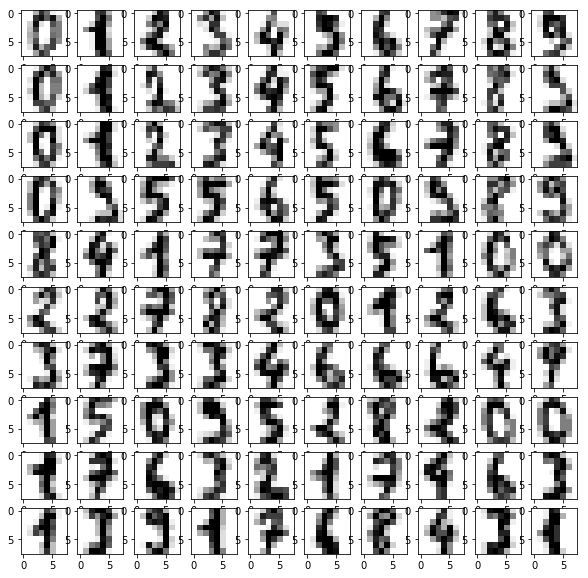

In [4]:
def plot_digits(data, row, col):
    fig, ax = plt.subplots(row, col, figsize=(10, 10))
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(8, 8), cmap = 'binary')
        im.set_clim(0, 16)
plot_digits(digits.data, 10, 10)

In [5]:
def get_mn(y):
    sq = mt.floor(np.sqrt(y))
    for i in range(sq, 1, -1):
        if y % i == 0:
            return int(y/i), i


In [6]:
def KDE(X):
    # use grid search cross-validation to optimize the bandwidth
    params = {'bandwidth': np.logspace(-1, 1,  num = 30)}
    grid = GridSearchCV(KernelDensity(), params, cv=7)
    grid.fit(X)

    print("best bandwidth: ",grid.best_estimator_.bandwidth)

    # use the best estimator to compute the kernel density estimate
    kde = grid.best_estimator_
    return kde

In [7]:
def GMM(X):
    interval = 10
    n_components = np.arange(1, 300, interval)
    models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X) 
              for n in n_components]
    BIC = [m.bic(X) for m in models]
    plt.plot(n_components, BIC, label='BIC')
    # plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
    plt.legend(loc='best')
    plt.xlabel('n_components');
    m = BIC.index(min(BIC))
    print("minimum BIC: " + str(m*interval))
    return models[m]
#     return "minimum BIC: " + str(BIC.index(min(BIC))*interval)

In [8]:
def drawKDE(kde, pca, n_sample):
    data_new = kde.sample(n_sample, random_state=0)
    digits_new = pca.inverse_transform(data_new)
    
    m, n = get_mn(n_sample)
    plot_digits(digits_new, m, n)
    return digits_new

In [9]:
def drawGMM(gmm, pca, n_sample):
    print(gmm.converged_)

    data_new, y_new = gmm.sample(n_sample)

    digits_new = pca.inverse_transform(data_new)
    m, n = get_mn(n_sample)
    plot_digits(digits_new, m, n)
    return digits_new

In [10]:
pca15d, data15d = createDataSet(digits, 15)

In [11]:
pca30d, data30d = createDataSet(digits, 30)

In [12]:
pca41d, data41d = createDataSet(digits, 41)

In [13]:
kde15d = KDE(data15d)
kde15d

best bandwidth:  3.856620421163472


KernelDensity(algorithm='auto', atol=0, bandwidth=3.856620421163472,
       breadth_first=True, kernel='gaussian', leaf_size=40,
       metric='euclidean', metric_params=None, rtol=0)

In [14]:
kde30d = KDE(data30d)
kde30d

best bandwidth:  3.2903445623126677


KernelDensity(algorithm='auto', atol=0, bandwidth=3.2903445623126677,
       breadth_first=True, kernel='gaussian', leaf_size=40,
       metric='euclidean', metric_params=None, rtol=0)

In [15]:
kde41d = KDE(data41d)
kde41d

best bandwidth:  2.807216203941177


KernelDensity(algorithm='auto', atol=0, bandwidth=2.807216203941177,
       breadth_first=True, kernel='gaussian', leaf_size=40,
       metric='euclidean', metric_params=None, rtol=0)

minimum BIC: 10


GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=11, n_init=1, precisions_init=None,
        random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

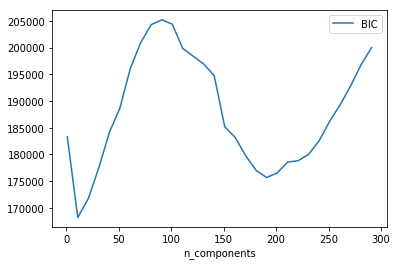

In [16]:
gmm15d = GMM(data15d)
gmm15d

minimum BIC: 110


GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=111, n_init=1, precisions_init=None,
        random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

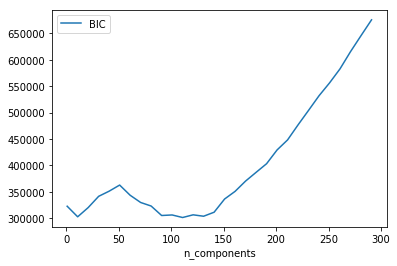

In [17]:
gmm30d = GMM(data30d)
gmm30d

minimum BIC: 90


GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=91, n_init=1, precisions_init=None,
        random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

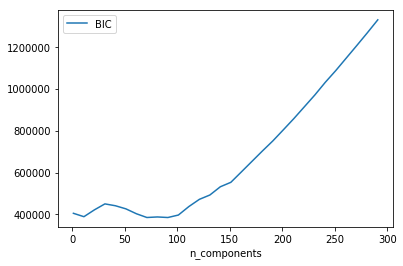

In [18]:
gmm41d = GMM(data41d)
gmm41d

array([[-2.86961611e-15,  1.73354462e+00,  1.64592872e+01, ...,
         6.89386440e+00,  6.23889004e+00,  2.03146579e+00],
       [ 4.87247022e-16,  3.89770289e-01,  8.18065918e+00, ...,
         2.71175891e+00, -2.04417889e+00, -1.22534560e-01],
       [-4.73634997e-16, -3.88556994e-01, -2.51210490e+00, ...,
         1.01868469e+00, -4.70313995e+00, -2.45571827e+00],
       ...,
       [ 3.64128021e-16,  7.56999380e-01,  1.03735508e+01, ...,
        -6.67322292e-01, -3.44069001e+00, -1.44281558e+00],
       [ 8.59925774e-16, -6.53465249e-02,  3.47041003e+00, ...,
         1.25554926e+01,  1.90736182e+00, -2.79647651e-01],
       [ 8.52288843e-16,  1.88588633e-01,  5.68420080e+00, ...,
         5.06410700e+00,  2.95456746e+00,  1.82613665e+00]])

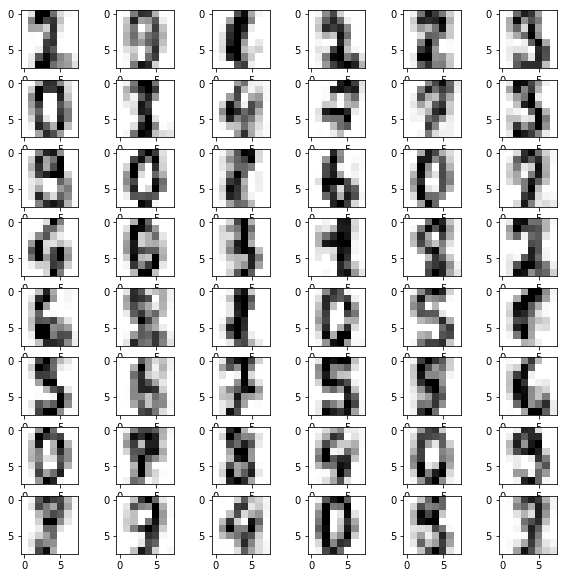

In [19]:
drawKDE(kde15d,pca15d,48)

array([[-1.69548183e-16,  1.82611253e+00,  1.67748633e+01, ...,
         1.11527262e+01,  6.23783644e+00,  1.97783924e+00],
       [ 2.53125557e-15,  9.37016601e-02,  6.53589271e+00, ...,
         8.23552728e-03,  1.15716970e+00,  1.65776046e+00],
       [ 1.56686099e-15, -2.72843557e-01,  1.74574583e+00, ...,
         3.69317570e+00,  2.90943519e+00,  3.16171659e-01],
       ...,
       [-9.97402879e-16,  1.21673447e+00,  1.05822600e+01, ...,
         6.19456744e+00,  2.02866728e+00, -1.46172085e-01],
       [ 2.05486484e-15,  1.73453483e-01,  5.38592759e+00, ...,
         1.62617596e+01,  5.60740772e+00,  7.36291881e-01],
       [-7.60840003e-17,  5.49699206e-01,  6.46483566e+00, ...,
         1.50112163e+00, -3.49290575e+00, -4.51537800e-01]])

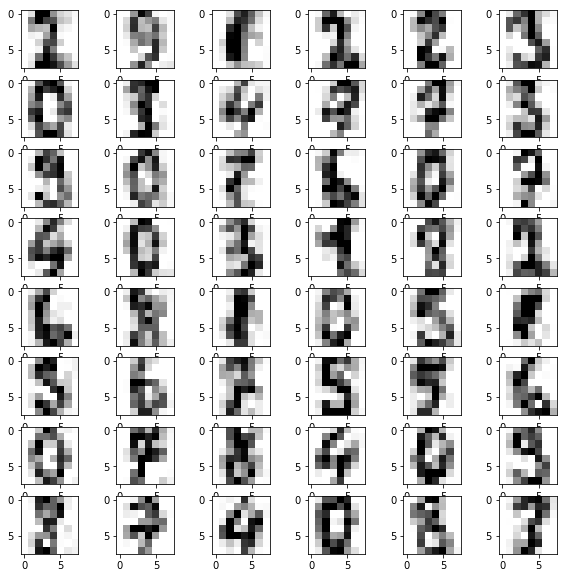

In [20]:
drawKDE(kde30d,pca30d,48)

array([[ 2.63804842e-15,  2.10821160e+00,  1.64015666e+01, ...,
         1.19229015e+01,  7.32543896e+00,  2.39250758e+00],
       [ 2.14187328e-15, -2.11355300e-02,  7.63953280e+00, ...,
         1.72124183e+00,  2.85088945e+00,  3.40395514e+00],
       [ 8.77172019e-16, -3.09665624e-04,  1.58906517e-01, ...,
         1.34744513e+00, -1.05150650e+00, -1.56726030e+00],
       ...,
       [-1.62562832e-15,  1.00439164e+00,  6.92680118e+00, ...,
         1.80656914e+00, -1.55103392e+00, -2.07617579e+00],
       [-1.20038127e-17,  4.03275586e-01,  4.71396585e-01, ...,
         1.30903574e+01,  3.55937553e+00, -1.64880091e+00],
       [ 5.56487346e-15,  8.55788037e-01,  4.83611411e+00, ...,
        -4.61283742e-02, -2.18725542e+00, -2.12074719e-01]])

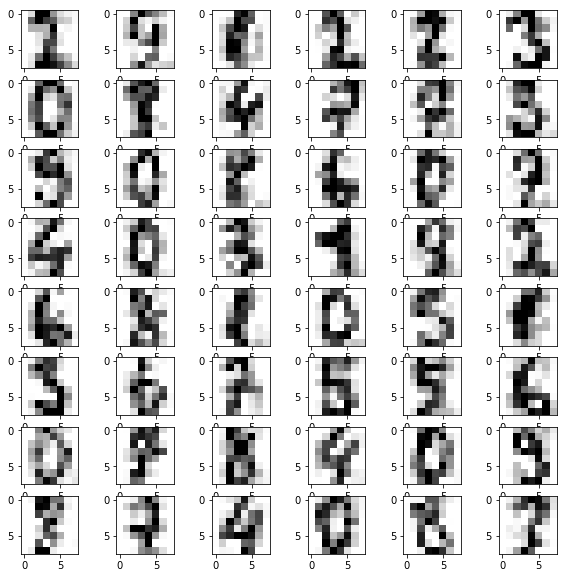

In [21]:
drawKDE(kde41d,pca41d,48)

True


array([[-1.00000591e-15,  8.95751668e-01,  1.04374746e+01, ...,
         1.73844166e+00,  1.97780364e+00,  1.22431596e+00],
       [-2.57095263e-15,  1.95182328e+00,  1.55980726e+01, ...,
        -2.51917192e+00,  1.72971578e+00,  9.89266410e-01],
       [-2.67387207e-15,  2.14972806e+00,  1.65226849e+01, ...,
         2.59392354e+00,  2.04370450e+00,  4.36391627e-02],
       ...,
       [ 3.33453104e-15, -8.99971861e-03, -1.53420995e+00, ...,
         2.10020156e+01,  7.88524959e+00,  1.82163648e+00],
       [ 1.20135738e-15, -7.79145260e-01, -3.92766097e+00, ...,
         1.34023603e+01,  4.12224689e+00, -5.74152498e-01],
       [ 7.63594018e-16,  2.33335792e-02,  2.35375525e+00, ...,
         1.71660324e+01,  9.22739533e+00,  2.00557731e+00]])

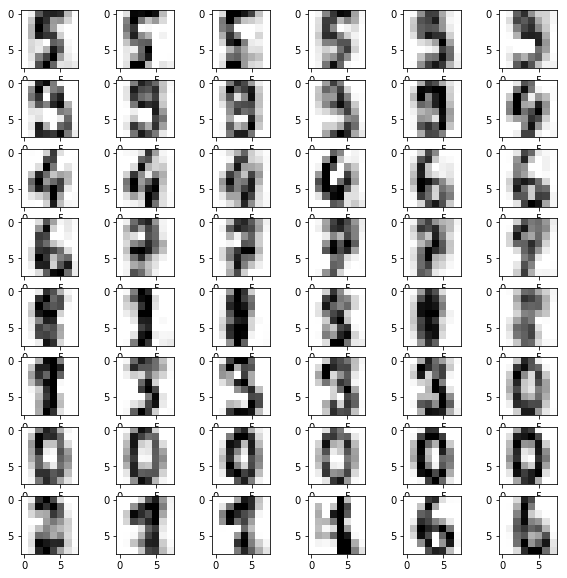

In [22]:
drawGMM(gmm15d, pca15d, 48)

True


array([[ 3.15843497e-16,  7.00420621e-01,  9.26521272e+00, ...,
         2.78235453e-01,  1.29114665e+00,  9.53841109e-01],
       [-2.07470062e-16, -2.01244526e-01,  2.10827190e+00, ...,
         1.29850608e+01,  2.30918144e+00, -2.82960720e-01],
       [ 3.52925524e-16, -2.46830526e-01, -4.00495570e-01, ...,
         4.22857236e+00,  1.05384475e+00,  9.86715254e-01],
       ...,
       [ 2.66883309e-15,  1.04764563e-01,  5.21355368e+00, ...,
         6.63591340e+00,  6.38419411e-01, -3.13789729e-01],
       [ 7.86164183e-16,  4.97855834e-01,  8.06726037e+00, ...,
         7.41516341e+00,  7.97854600e-01, -6.39538140e-02],
       [-3.50204107e-16,  1.05980362e+00,  1.09561583e+01, ...,
         9.87679862e+00, -2.65984876e-02, -7.77462189e-01]])

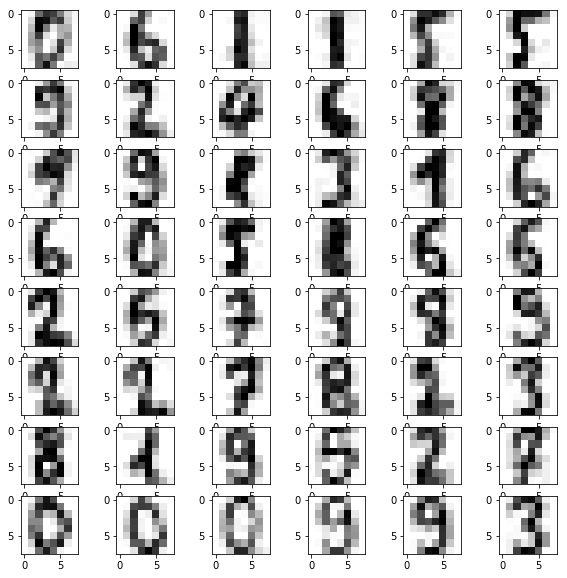

In [23]:
drawGMM(gmm30d, pca30d, 48)

True


array([[-1.10194964e-15, -5.90403617e-01,  6.26013260e-01, ...,
         3.94727395e+00,  1.03626815e-01,  1.83355442e-01],
       [-1.53765820e-15,  5.11718976e-03,  3.81932426e+00, ...,
         3.15227998e+00, -7.30315824e-02,  6.47275836e-01],
       [ 1.32353876e-15,  1.54715836e-01,  4.67805863e+00, ...,
         1.60491438e+01,  3.60830845e+00, -5.52433258e-01],
       ...,
       [ 1.79010116e-15,  5.48677826e-01,  1.15307756e+01, ...,
         1.00175158e+01,  4.64229434e-01,  1.16322995e+00],
       [ 5.93111178e-15,  1.11723993e+00,  1.55079648e+01, ...,
         1.47512994e+00, -1.67480991e-01,  1.00634677e+00],
       [ 2.70731235e-15, -1.94199435e-01,  6.23424681e+00, ...,
         4.69606729e+00, -1.93773028e+00, -1.67405844e-01]])

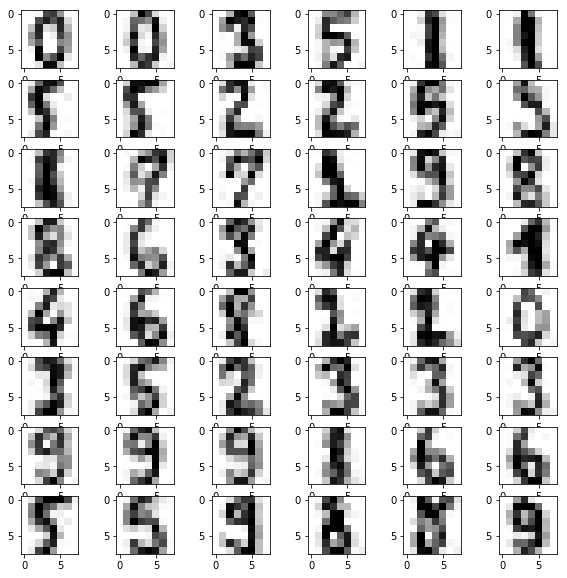

In [24]:
drawGMM(gmm41d, pca41d, 48)